# Face Detection and Feature Visualization


In [2]:
"""
*Uncomment if running on colab* 
Set Runtime -> Change runtime type -> Under Hardware Accelerator select GPU in Google Colab 
"""
!git clone https://github.com/hoihoic/OpenCV_face_detection_exercise.git
!mv OpenCV_face_detection_exercise/* ./

import cv2
import time
import xml.etree.ElementTree as ET
from google.colab.patches import cv2_imshow

xml_path = r'./haarcascade_frontalface_alt.xml'
image_path = r'./mambazo.jpg'

# Parsing xml for face detector
tree = ET.parse(xml_path)
root = tree.getroot()

haarcascade = [] 
feat_list = []

Cloning into 'OpenCV_face_detection_exercise'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 50 (delta 26), reused 36 (delta 15), pack-reused 0
Unpacking objects: 100% (50/50), done.


### Face Detection

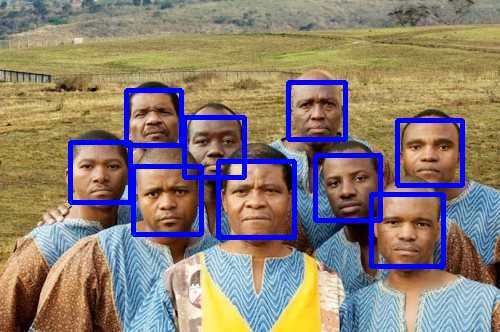

In [3]:
# Load an image
image = cv2.imread(image_path)

# Create and Load the detector
face_cascade = cv2.CascadeClassifier()
face_cascade.load(xml_path)

# Convert RGB to gray for input
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # problem (1)
faces = face_cascade.detectMultiScale(image_gray, scaleFactor = 1.02) # problem (2) scale: 2% increased at each scale
for f in faces:
  x, y, w, h = f
  image_copy = cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 3)
#cv2.imshow("face_detected", image_copy)
cv2_imshow(image_copy)
image = image[y:y+h, x:x+w, :]

w_f = int(root.findall('.//width')[0].text)
h_f = int(root.findall('.//height')[0].text)

h_ratio, w_ratio = h / h_f, w / w_f